In [24]:
# %matplotlib widget

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2D(matrix, title='FD matrix'):
    lim_margin = -0.05
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot()
    I, J = matrix.shape
    matrix_mag = np.log10(np.abs(matrix))
    ax.pcolor(matrix_mag[::-1])
    ax.set_xlim(-lim_margin, I+lim_margin)
    ax.set_ylim(-lim_margin, J+lim_margin)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', 'box')
    plt.title(title)
    plt.tight_layout()

What is the accuracy of different finite difference schemes outside of the $h\rightarrow 0$ limit?

In [26]:
kh = np.linspace(-np.pi,np.pi, num = 180)
kh.shape

(180,)

Text(0, 0.5, '$-i\\, h\\partial$')

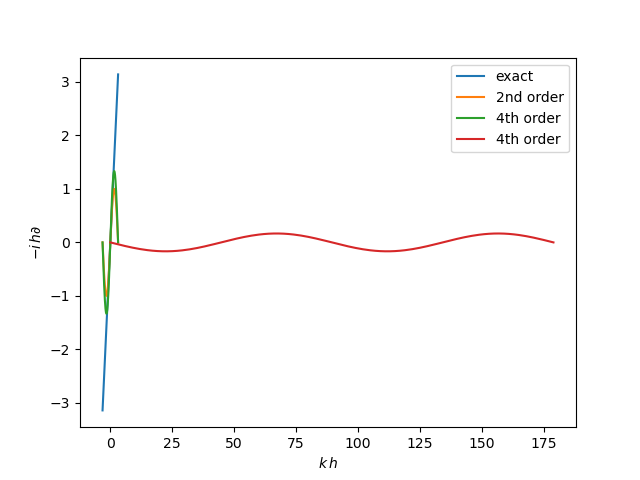

In [27]:
plt.figure()
plt.plot(kh,kh, label='exact')
plt.plot(kh, np.sin(kh), label='2nd order')
plt.plot(kh, 4/3*np.sin(kh),-1/6*np.sin(2*kh), label='4th order')
plt.legend()
plt.xlabel(r'$k\,h$')
plt.ylabel(r'$-i\, h\partial$')

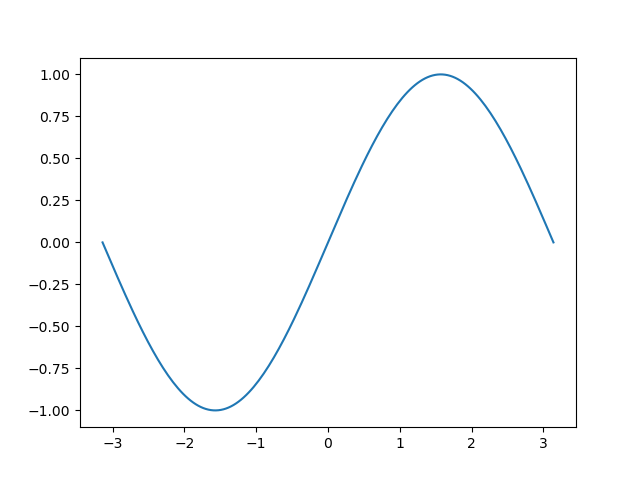

In [28]:
plt.figure()
plt.plot(kh,np.sin(kh))

Now let's try taking a derivative numerically. Say we have a function $f(x)$ which is periodic from $0$ to $2\pi$. We want to come up with a way to take a derivative of $f(x)$. Say we know the value of $f(x)$ on an evenly-spaced grid of points $x_i$.

The derivative operator is a linear operator, so we wish to represent it as a matrix. The matrix is zero almost everywhere, so we will write it in terms of a sparse matrix.

In [29]:
import scipy.sparse as sparse

Next we want to test the convergence of the algorithm.

In [30]:
N_range = [50, 100, 200, 400]

errors = []
for N in N_range:

    
    
    df = D @ f(x)
    
    error = np.max(np.abs(df + np.sin(x)))
    errors.append(error)
    
N_range = np.array(N_range)
errors = np.array(errors)

NameError: name 'D' is not defined

In [ ]:
plt.figure()
plt.loglog(N_range, errors, marker='*', markersize=10)
plt.loglog(N_range, errors[0]/2*(N_range[0]/N_range)**2, linestyle='--')
plt.xlabel(r'$N\sim h^{-1}$')
plt.ylabel(r'error')